In [1]:
# Importing the required libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [2]:
# Reading the csv file and putting it into 'df' object.
df = pd.read_csv('heart_v2.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            270 non-null    int64
 1   sex            270 non-null    int64
 2   BP             270 non-null    int64
 3   cholestrol     270 non-null    int64
 4   heart disease  270 non-null    int64
dtypes: int64(5)
memory usage: 10.7 KB


In [5]:
df.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


**Split into X and y**

In [3]:
# Putting feature variable to X
X = df.drop('heart disease',axis=1)

# Putting response variable to y
y = df['heart disease']

**train_test_split**

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((189, 4), (81, 4))

## <font color=red>Tree model

**Fitting the decision tree with default hyperparameters, apart from max_depth which is 3 so that we can plot and read the tree.**

In [6]:
from sklearn.tree import DecisionTreeClassifier

In [7]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

**Building model**

In [29]:
# !pip install six
# pip install pydotplus
# pip install graphviz

**Visualization using graphviz**

In [8]:
# Importing required packages for visualization
from IPython.display import Image  
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

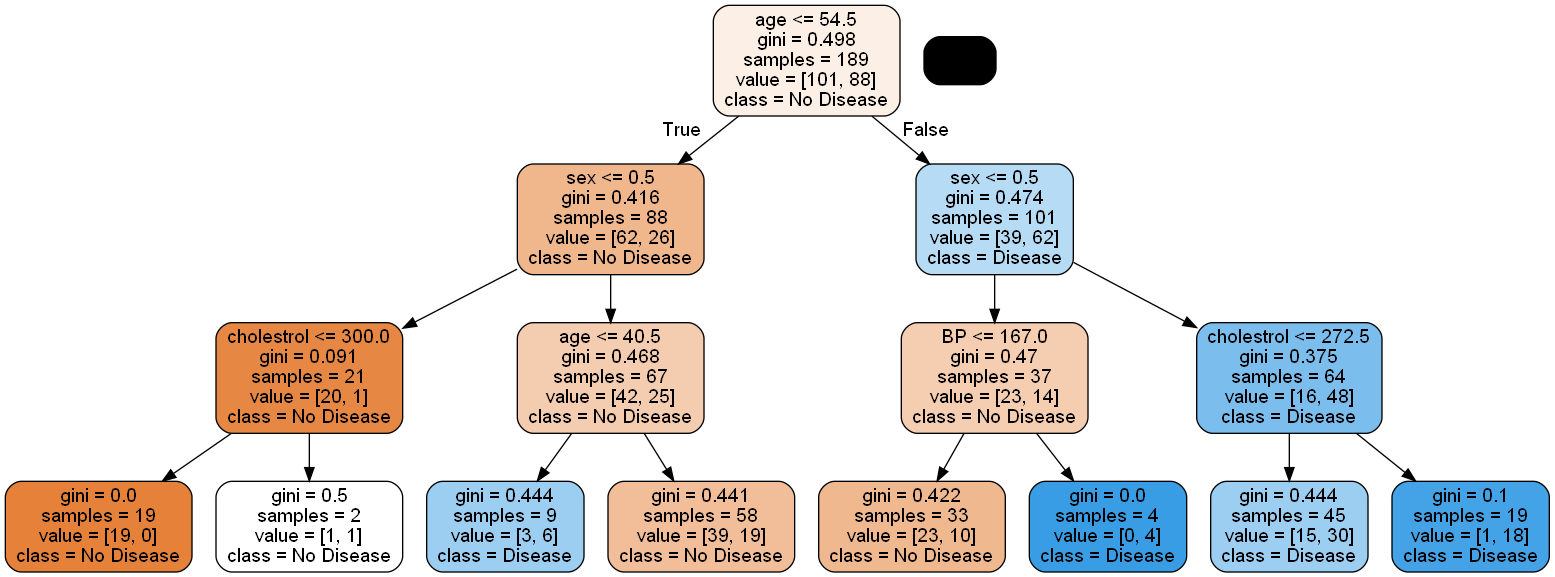

In [15]:
# plotting tree with max_depth=3
dot_data = StringIO()  

export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,
                feature_names=X.columns, 
                class_names=['No Disease', "Disease"])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())
#Image(graph.create_png(),width=800,height=900)
#graph.write_pdf("dt_heartdisease.pdf")

**Visualisation using sklearn plot_tree**

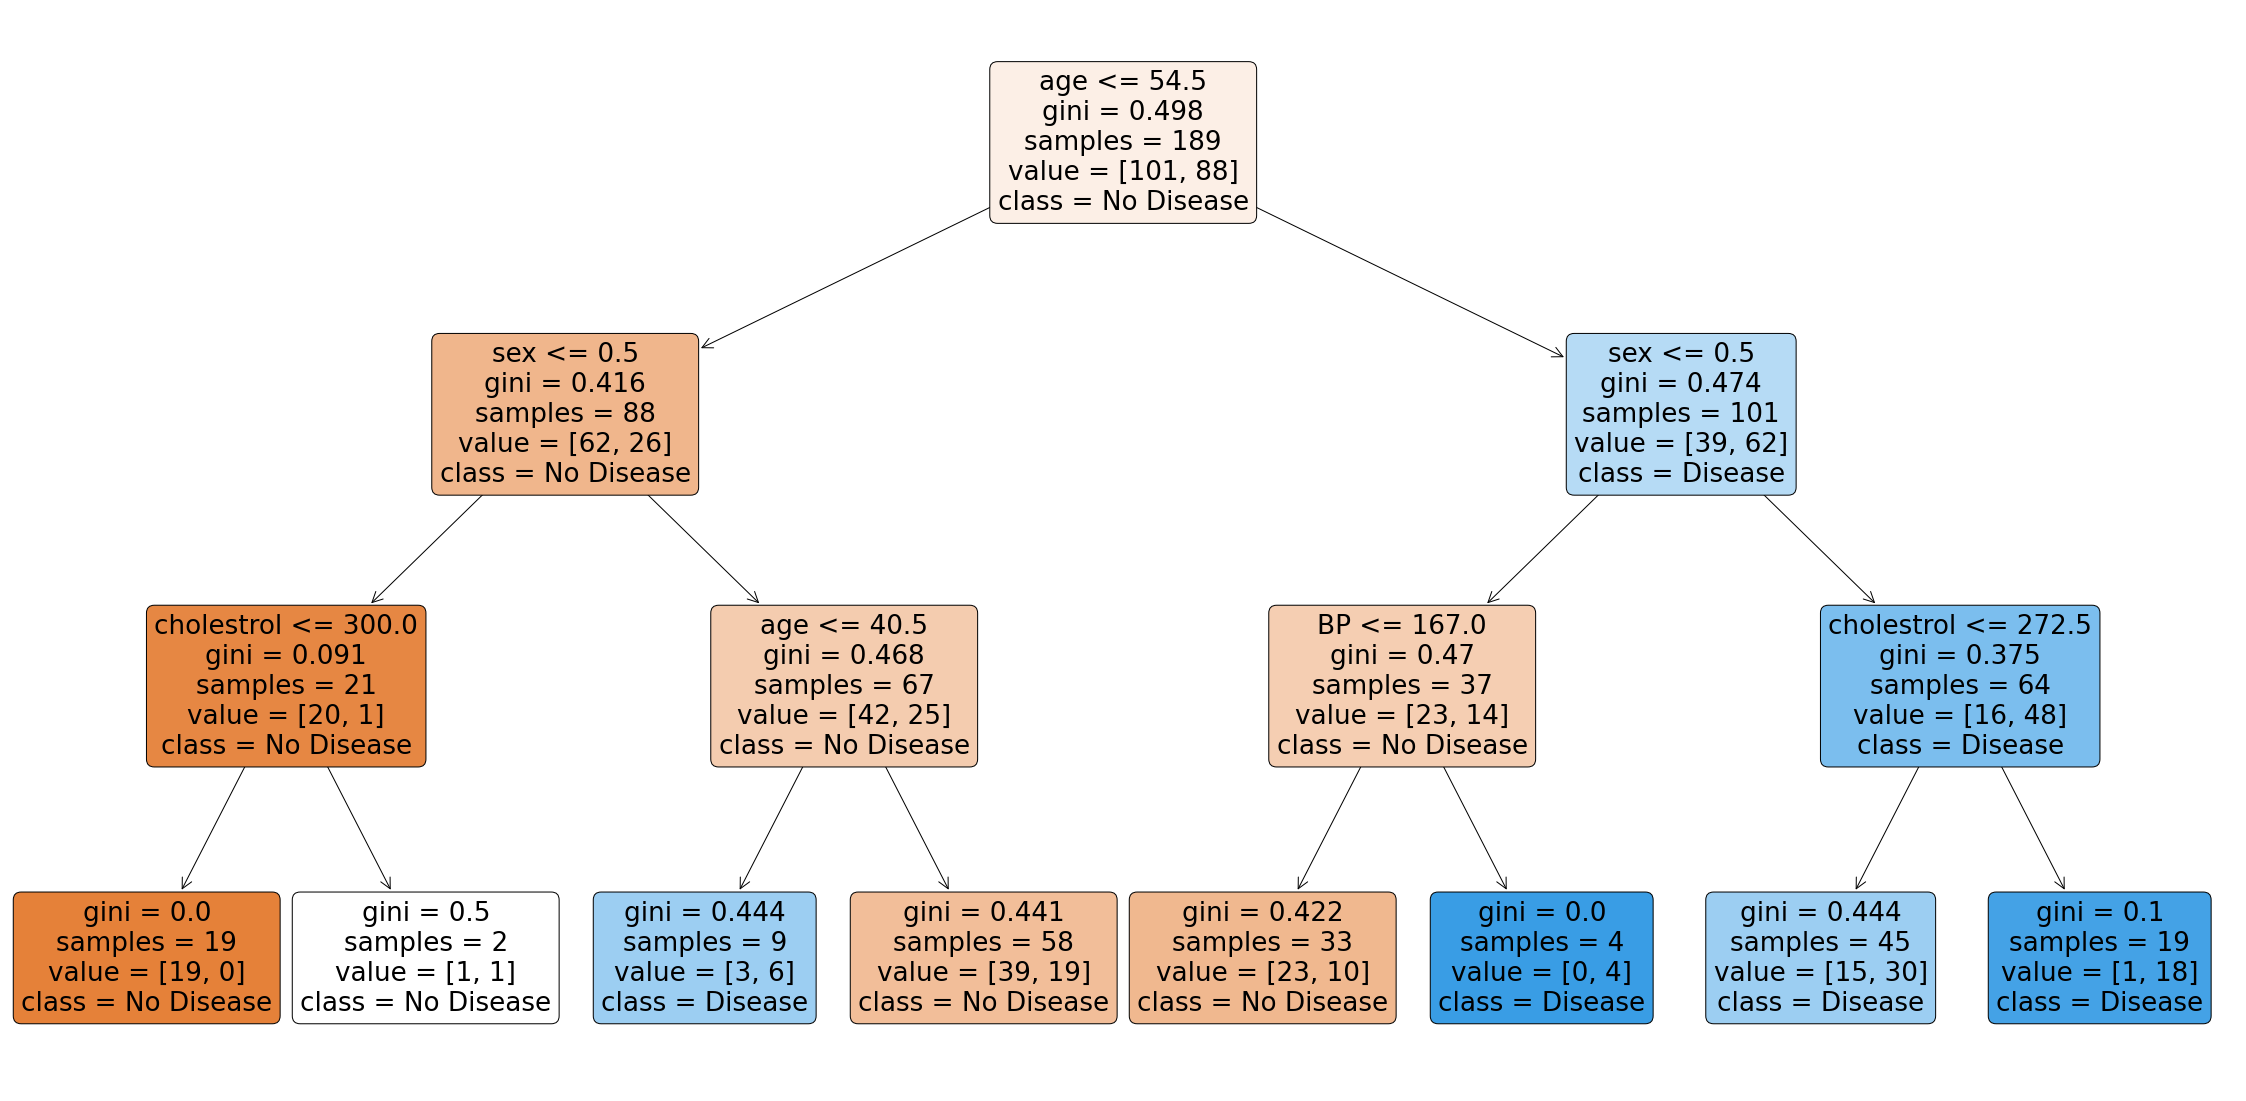

In [23]:
from sklearn import tree

plt.figure(figsize=(40,20))
tree.plot_tree(dt, max_depth=3, feature_names=X.columns, class_names=['No Disease','Disease'],
              filled=True, rounded=True)

plt.show()

#### Evaluating model performance

In [11]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [25]:
# accuracy score and confusion matrix for train data
acc_train_tree = accuracy_score(y_train, y_train_pred)
print(acc_train_tree)
confusion_matrix(y_train, y_train_pred)

0.7407407407407407


array([[82, 19],
       [30, 58]], dtype=int64)

In [26]:
# accuracy score and confusion matrix for test data
acc_test_tree = accuracy_score(y_test, y_test_pred)
print(acc_test_tree)
confusion_matrix(y_test, y_test_pred)

0.6049382716049383


array([[35, 14],
       [18, 14]], dtype=int64)

In [61]:
y_tree_pred = dt.predict(X)

# predicted
df_tree = df.copy()
df_tree['predicted'] = y_tree_pred
df_tree.head()

,age,sex,BP,cholestrol,heart disease,predicted
0,70,1,130,322,1,1
1,67,0,115,564,0,0
2,57,1,124,261,1,1
3,64,1,128,263,0,1
4,74,0,120,269,0,0


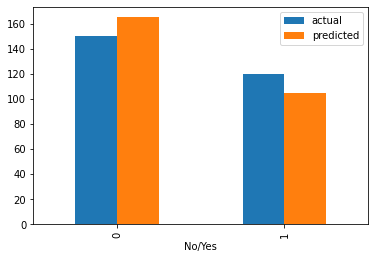

In [66]:
# visulaising predictions vs actual
df1 = pd.DataFrame(df_tree['heart disease'].value_counts())
df2 = pd.DataFrame(df_tree['predicted'].value_counts())
df_final = pd.concat([df1,df2],axis=1).reset_index().rename(columns={'index':'No/Yes','heart disease':'actual'})
df_final.plot(x='No/Yes',y=['actual','predicted'], kind='bar')
plt.show()

## <font color=red> Logistic regression

In [76]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [78]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [79]:
# accuracy score and confusion matrix for train data
acc_train_lr = accuracy_score(y_train, y_train_pred)
print(acc_train_lr)
confusion_matrix(y_train, y_train_pred)

0.708994708994709


array([[75, 26],
       [29, 59]], dtype=int64)

In [80]:
# accuracy score and confusion matrix for test data
acc_test_lr = accuracy_score(y_test, y_test_pred)
print(acc_test_lr)
confusion_matrix(y_test, y_test_pred)

0.654320987654321


array([[35, 14],
       [14, 18]], dtype=int64)

In [81]:
y_lr_pred = lr.predict(X)

# predicted
df_lr = df.copy()
df_lr['predicted'] = y_lr_pred
df_lr.head()

,age,sex,BP,cholestrol,heart disease,predicted
0,70,1,130,322,1,1
1,67,0,115,564,0,0
2,57,1,124,261,1,1
3,64,1,128,263,0,1
4,74,0,120,269,0,0


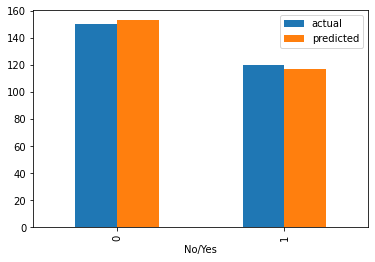

In [82]:
# visulaising predictions vs actual
df1 = pd.DataFrame(df_lr['heart disease'].value_counts())
df2 = pd.DataFrame(df_lr['predicted'].value_counts())
df_final = pd.concat([df1,df2],axis=1).reset_index().rename(columns={'index':'No/Yes','heart disease':'actual'})
df_final.plot(x='No/Yes',y=['actual','predicted'], kind='bar')
plt.show()